In [218]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.autograd as autograd
import matplotlib.pyplot as plt

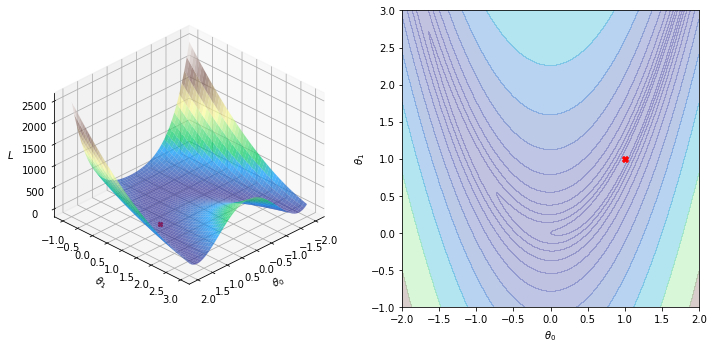

In [224]:
def rosenbrock(x, y):
    # https://en.wikipedia.org/wiki/Test_functions_for_optimization
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

target = (1, 1)
A, B = torch.meshgrid(torch.linspace(-2, 2, 801), torch.linspace(-1, 3, 801), indexing='ij')
Q = rosenbrock(A, B)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221, projection='3d', proj_type='ortho')
ax.plot_surface(A, B, Q, cmap='terrain', alpha=.7)
ax.scatter(*target, rosenbrock(*target), c='r', zorder=4, marker='X')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$L$')
ax.view_init(30, 45)

ax = fig.add_subplot(222)
ax.contourf(A, B, Q, alpha=.3, levels=[2**i-1 for i in range(13)], cmap='terrain')
ax.scatter(*target, c='r', zorder=4, marker='X')
ax.axis('square')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

plt.show()

In [220]:
Theta = torch.tensor([-2, 2], dtype=torch.float32)
lr = 1e-3

history = {'theta': [],
           'loss': [],}
for i in range(500):
    history['theta'].append(Theta.tolist())
    history['loss'].append(rosenbrock(*Theta).item())
    Theta = Theta - lr * torch.tensor(autograd.functional.jacobian(rosenbrock, (*Theta,)))

history = {k: torch.tensor(v) for k, v in history.items()}

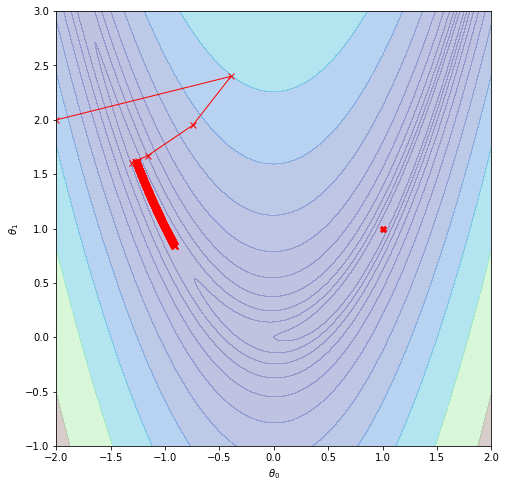

In [221]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.contourf(A, B, Q, alpha=.3, levels=[2**i-1 for i in range(13)], cmap='terrain')
ax.axis('square')
ax.scatter(*target, c='r', zorder=4, marker='X')
ax.plot(*history['theta'].T, 'rx-', linewidth=1)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

plt.show()